# Berlin's Covid Evolution, Spread, and Distribution by District

## Table of Contents

1. Introduction
2. Install & Import Packages
3. Scrape Confirmed Cases Data
4. Rolling 7-Day Average Cases by District
5. Scrape Population Data
6. Create Incidence Dataframe
7. Incidence (per 100,000) 

## 1. Introduction

More striking than Berlin's recent covid case spike is how differently covid has evolved by district throughout the year. Let's analyze and visualize Berlin's case evolution over time and the spread and distribution of incidence (per 100,000) by district. Keep in mind, we don't factor in or attribute exogenous variables like increased testing and the fact that the true positivity rate in the population may be much higher than that indicated by confirmed positive tests. 

We'll scrape confirmed case data by district (https://www.berlin.de/lageso/gesundheit/infektionsepidemiologie-infektionsschutz/corona/tabelle-bezirke-gesamtuebersicht/) and convert it to a dataframe with the data types and index we need. We'll calculate the rolling 7-day average of cases by district and create a visual, including custom text highlighting events over the course of the pandemic. As district populations vary widely, incidence would provide a better apples-to-apples comparison. Let's scrape population data (https://en.wikipedia.org/wiki/Demographics_of_Berlin), calculate incidence by district, and create a dataframe. While population data is from the last census in Germany in 2010 and Berlin's population has grown quite dramatically since then, it's sufficient for the purpose here of calculating an approximate incidence to make comparisons. Lastly, let's compare incidence by district, create a boxplot highlighting differences in spread, and create a density plot highlighting difference in distribution.   

Key findings: 
1. Berlin's most recent total rolling 7-day average of confirmed cases on October 21, 2020 was 3x of the peak of the 1st wave in March, with the most dramatic case averages in Mitte, Neukolln, Tempelhof-Shoneberg, and Friedrichshain. 
2. Most district incidence means are higher than medians, indicating a right skew with higher-end outliers (as we can see with the max values). Mitte and Neukolln's mean incidence of 5 is roughly 2x that of Pankow, Spandau, and Steglitz. Tempelhof-Schoneberg, Charlottenburg, and Reinickendorf feature a mean incidence of about 3. Mitte and Neukolln's median, which is less vulnerable to outliers, of >2 is nearly 2x higher than most other districts. Most striking, the current incidence (not the 7-day avereage) is many factors higher than the mean, with Mitte, Neukolln, and Friedrichshain-Kreuzberg's at >50 and Friedrichshain-Kreuzberg approaching 45. Additionally, Mitte and Neukolln's standard deviation of >8 is significantly higher the other districts. 
3. The boxplot reveals Mitte and Friedrichshain-Kreuzberg feature the highest IQR, while Neukolln features more higher-end outliers. Interestingly, Pankow, which has the lowest median, also features a much tighter spread and fewer outliers. 
4. The density plot of incidence reveals that Pankow, Charlottenburg, and Tempelhof-Schoneberg have a fairly tight distribution around the mean, while Mitte and Neukolln have a much broader, right-skewed distribution around a higher mean. The purpose of this is to visualize Berlin's current covid landscape by district.

Taken together, Mitte and Neukolln, even accounting for differences in population (though we don't incorporate population density here), has fared far worse than districts like Pankow. 

## 2. Install & Import Packages

In [629]:
import pandas as pd
import numpy as np

#import matplotlib.ticker as ticker

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.dates as dates
from datetime import datetime

# Web scraping using BeautifulSoup and converting to pandas dataframe
import requests 
import urllib.request 
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from urllib.request import urlopen
from bs4 import BeautifulSoup
!pip install lxml # Install lxml parser as it's faster than the built-in html parser

## 3. Scrape Confirmed Cases Data

In [630]:
# Specify url and get html from page
url = "https://www.berlin.de/lageso/gesundheit/infektionsepidemiologie-infektionsschutz/corona/tabelle-bezirke-gesamtuebersicht/"
html = urlopen(url)

In [631]:
# Create BeautifulSoup object using lxml parser we imported
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [632]:
# Title of the page
title = soup.title
print(title)

<title>COVID-19 in Berlin, Verteilung in den Bezirken - Gesamtübersicht - Berlin.de</title>


In [633]:
# Create table object to extract the raw table inside that webpage
table = soup.find_all('table')

In [634]:
# Scrape just the new case by district table, which is the 1st table and convert it into a dataframe
covid = pd.read_html(str(table[0]), index_col=None, header=0)[0]
covid

,Datum,MI,FK,PA,CW,SP,SZ,TS,NK,TK,MH,LI,RD
0,03.03.2020,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,04.03.2020,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,05.03.2020,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,06.03.2020,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,07.03.2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,18.10.2020,30.0,0.0,0.0,0.0,26.0,14.0,30.0,80.0,0.0,1.0,0.0,14.0
230,19.10.2020,118.0,142.0,44.0,80.0,21.0,44.0,99.0,137.0,31.0,9.0,32.0,22.0
231,20.10.2020,172.0,71.0,54.0,66.0,24.0,40.0,147.0,182.0,37.0,26.0,31.0,51.0
232,21.10.2020,196.0,80.0,55.0,52.0,0.0,32.0,79.0,153.0,36.0,31.0,42.0,60.0


In [635]:
# Check info. We need to convert Date from object to datetime type and all other data types from float to int. 
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Datum   233 non-null    object 
 1   MI      233 non-null    float64
 2   FK      233 non-null    float64
 3   PA      233 non-null    float64
 4   CW      233 non-null    float64
 5   SP      233 non-null    float64
 6   SZ      233 non-null    float64
 7   TS      233 non-null    float64
 8   NK      233 non-null    float64
 9   TK      233 non-null    float64
 10  MH      233 non-null    float64
 11  LI      233 non-null    float64
 12  RD      233 non-null    float64
dtypes: float64(12), object(1)
memory usage: 23.9+ KB


In [636]:
# Change column names to English and spell out district acroynyms. Remove the last row of null values
covid = covid.rename(columns={'Datum': 'Date', 'MI': 'Mitte', 'FK':'Friedrichshain-Kreuzberg', 'PA':'Pankow', 'CW': 'Charlottenburg-Wilmersdorf', 'SP':'Spandau', 'SZ':'Steglitz-Zehlendorf','TS':'Tempelhof-Schöneberg','NK':'Neukölln','TK':'Treptow-Köpenick','MH':'Marzahn-Hellersdorf','LI':'Lichtenberg','RD':'Reinickendorf'}).dropna()

# Non-date values are floats. Change data type of values to integers. Change type of Date column to datetime
covid = covid.astype({'Mitte':int, 'Friedrichshain-Kreuzberg':int,'Pankow':int,'Charlottenburg-Wilmersdorf':int,'Spandau':int,'Steglitz-Zehlendorf':int,'Tempelhof-Schöneberg':int,'Neukölln':int,'Treptow-Köpenick':int, 'Marzahn-Hellersdorf':int,'Lichtenberg':int,'Reinickendorf':int})
covid['Date'] = pd.to_datetime(covid['Date'])

# Set index to date
covid=covid.set_index('Date')

covid

,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Neukölln,Treptow-Köpenick,Marzahn-Hellersdorf,Lichtenberg,Reinickendorf
Date,,,,,,,,,,,,
2020-03-03,3,0,0,0,0,0,1,1,0,1,0,0
2020-04-03,0,2,1,0,0,0,0,0,0,0,0,0
2020-05-03,4,2,2,0,0,0,0,0,0,0,0,2
2020-06-03,1,0,1,2,0,0,1,0,0,0,0,0
2020-07-03,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17,0,13,3,19,31,24,30,0,0,6,0,38
2020-10-18,30,0,0,0,26,14,30,80,0,1,0,14
2020-10-19,118,142,44,80,21,44,99,137,31,9,32,22


In [637]:
# Let's check the info - date is the index and we have the date types we want 
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2020-03-03 to 2020-10-21
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Mitte                       233 non-null    int64
 1   Friedrichshain-Kreuzberg    233 non-null    int64
 2   Pankow                      233 non-null    int64
 3   Charlottenburg-Wilmersdorf  233 non-null    int64
 4   Spandau                     233 non-null    int64
 5   Steglitz-Zehlendorf         233 non-null    int64
 6   Tempelhof-Schöneberg        233 non-null    int64
 7   Neukölln                    233 non-null    int64
 8   Treptow-Köpenick            233 non-null    int64
 9   Marzahn-Hellersdorf         233 non-null    int64
 10  Lichtenberg                 233 non-null    int64
 11  Reinickendorf               233 non-null    int64
dtypes: int64(12)
memory usage: 23.7 KB


## 4. Rolling 7-Day Average Cases by District

The rolling 7-day average confirmed cases by district for all of Berlin on October 21 is nearly 3x that of the peak of the 1st wave in March, with the most dramatic case averages in Mitte, Neukolln, Tempelhof-Shoneberg, and Friedrichshain. 

In [638]:
# Create dataframe for rolling 7-day average of cases
rolling_7 = covid.rolling(7).mean()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


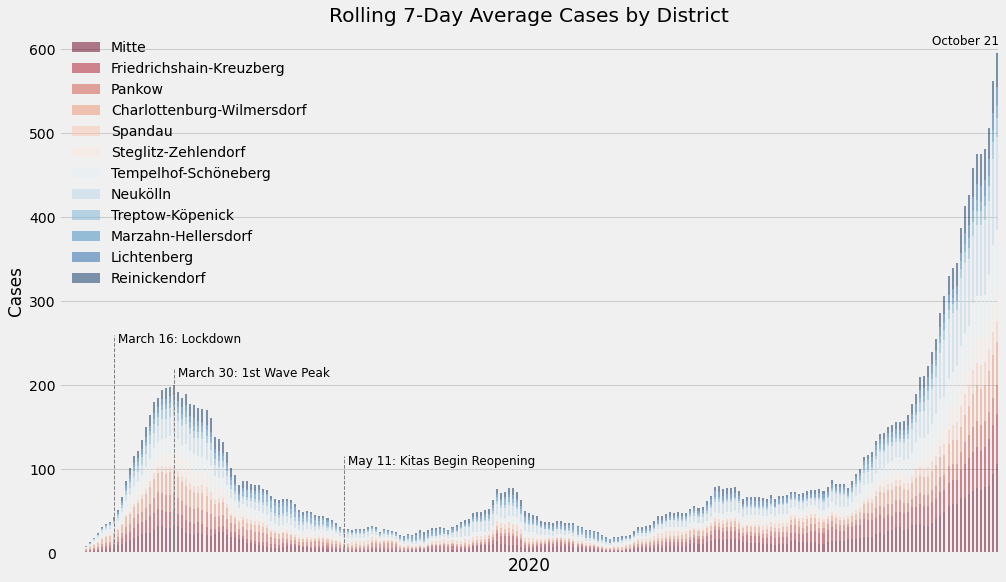

In [639]:
# Call FiveThirtyEight style for plot
mpl.style.use("fivethirtyeight")

# Area plot of Xinjiang sites by type 
rolling_7.plot(kind='bar', stacked=True, alpha = 0.5, figsize=(15, 9), cmap='RdBu')
plt.title('Rolling 7-Day Average Cases by District')
plt.ylabel('Cases')
plt.xlabel('2020')
plt.legend(loc='upper left',frameon=False)

ax = plt.gca()
ax = plt.axes()        
ax.xaxis.grid() # horizontal lines
plt.xticks([], [])

plt.vlines([13, 28, 70], ymin=0, ymax=[260, 220, 115], colors='gray', lw=1, ls='--')
plt.text(14, 250, 'March 16: Lockdown', fontsize=12)
plt.text(29, 210, 'March 30: 1st Wave Peak', fontsize=12)
plt.text(71, 105, 'May 11: Kitas Begin Reopening', fontsize=12)
plt.text(216, 605, 'October 21', fontsize=12)

plt.show()

## 5. Scrape Population Data

In [640]:
# Specify url and get html from page
url = "https://en.wikipedia.org/wiki/Demographics_of_Berlin"
html = urlopen(url)

In [641]:
# Create BeautifulSoup object using lxml parser we imported
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [642]:
# Title of the page
title = soup.title
print(title)

<title>Demographics of Berlin - Wikipedia</title>


In [643]:
# Create table object to extract the raw table inside that webpage
table = soup.find_all('table')

In [644]:
# Scrape just population by district table, which is the 3rd table and convert it into a dataframe
population = pd.read_html(str(table[4]), index_col=None, header=0)[0]
population

,Borough,Population 2010,Area in km²,Largest Non-German ethnic groups
0,Mitte,332100,39.47,"Turks, Arabs, Kurds, Asians, Western Europeans"
1,Friedrichshain-Kreuzberg,268831,20.16,"Turks, Arabs, Africans, Kurds, Chinese"
2,Pankow,368956,103.01,"Poles, Italians, French, Americans, Vietnamese..."
3,Charlottenburg-Wilmersdorf,320014,64.72,"Turks, Africans, Russians, Arabs"
4,Spandau,225420,91.91,"Turks, Africans, Russians, Arabs"
5,Steglitz-Zehlendorf,293989,102.50,"Poles, Turks, Croats, Serbs, Koreans"
6,Tempelhof-Schöneberg,335060,53.09,"Turks, Croats, Serbs, Koreans, Africans"
7,Neukölln,310283,44.93,"Arabs, Turks, Kurds, Russians, Africans, Poles"
8,Treptow-Köpenick,241335,168.42,"Russians, Poles, Ukrainians, Vietnamese"
9,Marzahn-Hellersdorf,248264,61.74,"Russians, Vietnamese, Eastern Europeans"


In [645]:
# Set index to borough
population = population.set_index('Borough')

# Keep only population column
keep = ['Population 2010']
population = population[keep]

# Drop total Berlin row as we're focusing on district breakouts
population = population.drop(['Total Berlin'])

population

,Population 2010
Borough,
Mitte,332100
Friedrichshain-Kreuzberg,268831
Pankow,368956
Charlottenburg-Wilmersdorf,320014
Spandau,225420
Steglitz-Zehlendorf,293989
Tempelhof-Schöneberg,335060
Neukölln,310283
Treptow-Köpenick,241335


## 6. Create Incidence Dataframe

In [646]:
# Copy covid case dataframe
covid_incidence = covid.copy()

# Calculate incidence as cases per 100,000 for each district by multiplying district cases by 100000 and dividing by district population
covid_incidence['Mitte'] = covid_incidence['Mitte'].mul(100000).div(population.loc['Mitte', 'Population 2010'])
covid_incidence['Friedrichshain-Kreuzberg'] = covid_incidence['Friedrichshain-Kreuzberg'].mul(100000).div(population.loc['Friedrichshain-Kreuzberg', 'Population 2010'])
covid_incidence['Pankow'] = covid_incidence['Pankow'].mul(100000).div(population.loc['Pankow', 'Population 2010'])
covid_incidence['Charlottenburg-Wilmersdorf'] = covid_incidence['Charlottenburg-Wilmersdorf'].mul(100000).div(population.loc['Charlottenburg-Wilmersdorf', 'Population 2010'])
covid_incidence['Spandau'] = covid_incidence['Spandau'].mul(100000).div(population.loc['Spandau', 'Population 2010'])
covid_incidence['Steglitz-Zehlendorf'] = covid_incidence['Steglitz-Zehlendorf'].mul(100000).div(population.loc['Steglitz-Zehlendorf', 'Population 2010'])
covid_incidence['Tempelhof-Schöneberg'] = covid_incidence['Tempelhof-Schöneberg'].mul(100000).div(population.loc['Tempelhof-Schöneberg', 'Population 2010'])
covid_incidence['Neukölln'] = covid_incidence['Neukölln'].mul(100000).div(population.loc['Neukölln', 'Population 2010'])
covid_incidence['Treptow-Köpenick'] = covid_incidence['Treptow-Köpenick'].mul(100000).div(population.loc['Treptow-Köpenick', 'Population 2010'])
covid_incidence['Marzahn-Hellersdorf'] = covid_incidence['Marzahn-Hellersdorf'].mul(100000).div(population.loc['Marzahn-Hellersdorf', 'Population 2010'])
covid_incidence['Lichtenberg'] = covid_incidence['Lichtenberg'].mul(100000).div(population.loc['Lichtenberg', 'Population 2010'])
covid_incidence['Reinickendorf'] = covid_incidence['Reinickendorf'].mul(100000).div(population.loc['Reinickendorf', 'Population 2010'])

covid_incidence

,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Neukölln,Treptow-Köpenick,Marzahn-Hellersdorf,Lichtenberg,Reinickendorf
Date,,,,,,,,,,,,
2020-03-03,0.903342,0.000000,0.000000,0.000000,0.000000,0.000000,0.298454,0.322286,0.000000,0.402797,0.000000,0.000000
2020-04-03,0.000000,0.743962,0.271035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-03,1.204456,0.743962,0.542070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.831760
2020-06-03,0.301114,0.000000,0.271035,0.624973,0.000000,0.000000,0.298454,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-03,0.000000,0.000000,0.000000,0.312486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17,0.000000,4.835752,0.813105,5.937240,13.752107,8.163571,8.953620,0.000000,0.000000,2.416782,0.000000,15.803438
2020-10-18,9.033424,0.000000,0.000000,0.000000,11.534025,4.762083,8.953620,25.782914,0.000000,0.402797,0.000000,5.822319
2020-10-19,35.531466,52.821289,11.925541,24.998906,9.315944,14.966546,29.546947,44.153241,12.845215,3.625173,12.313328,9.149359


## 7. Incidence (per 100,000)

Most district incidence means are higher than medians, indicating a right skew with higher-end outliers (as we can see with the max values). Mitte and Neukolln's mean incidence of 5 is roughly 2x that of Pankow, Spandau, and Steglitz. Tempelhof-Schoneberg, Charlottenburg, and Reinickendorf feature a mean incidence of about 3. Mitte and Neukolln's median, which is less vulnerable to outliers, of >2 is nearly 2x higher than most other districts. Most striking, the current incidence (not the 7-day avereage) is many factors higher than the mean, with Mitte, Neukolln, and Friedrichshain-Kreuzberg's at >50 and Friedrichshain-Kreuzberg approaching 45. Additionally, Mitte and Neukolln's standard deviation of >8 is significantly higher the other districts. 

In [647]:
covid_incidence.describe()

,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Neukölln,Treptow-Köpenick,Marzahn-Hellersdorf,Lichtenberg,Reinickendorf
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,5.068539,3.877861,2.135709,2.992090,2.389436,2.179580,3.230476,5.047310,1.662782,1.647492,1.894231,3.050381
std,8.016672,6.154228,2.920364,4.189177,3.185309,3.079714,5.127531,8.784439,2.719461,1.847194,2.533924,4.250281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.903342,0.371981,0.271035,0.624973,0.443616,0.340149,0.298454,0.644573,0.000000,0.402797,0.000000,0.415880
50%,2.408913,1.859905,1.084140,1.249945,1.330849,1.020446,1.492270,2.256005,0.414362,1.208391,1.154375,1.663520
75%,6.022282,4.835752,2.710350,3.437350,3.105315,2.721190,3.581448,4.512010,2.071809,2.416782,2.693541,3.742920
max,59.018368,52.821289,14.906927,24.998906,20.406353,17.347588,43.872739,58.656130,16.574471,12.486708,16.161243,24.952798


In [648]:
# Let's focus on a few key districts 
keep = ['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow', 'Charlottenburg-Wilmersdorf', 'Tempelhof-Schöneberg', 'Neukölln']
covid_incidence = covid_incidence[keep]
covid_incidence.tail()

,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Tempelhof-Schöneberg,Neukölln
Date,,,,,,
2020-10-17,0.000000,4.835752,0.813105,5.937240,8.953620,0.000000
2020-10-18,9.033424,0.000000,0.000000,0.000000,8.953620,25.782914
2020-10-19,35.531466,52.821289,11.925541,24.998906,29.546947,44.153241
2020-10-20,51.791629,26.410645,14.635892,20.624098,43.872739,58.656130
2020-10-21,59.018368,29.758473,14.906927,16.249289,23.577867,49.309824


The boxplot reveals Mitte and Friedrichshain-Kreuzberg feature the highest IQR, while Neukolln features more higher-end outliers. Interestingly, Pankow, which has the lowest median, also features a much tighter spread and fewer outliers. 

Text(0.5, 0, 'Incidence (per 100,000)')

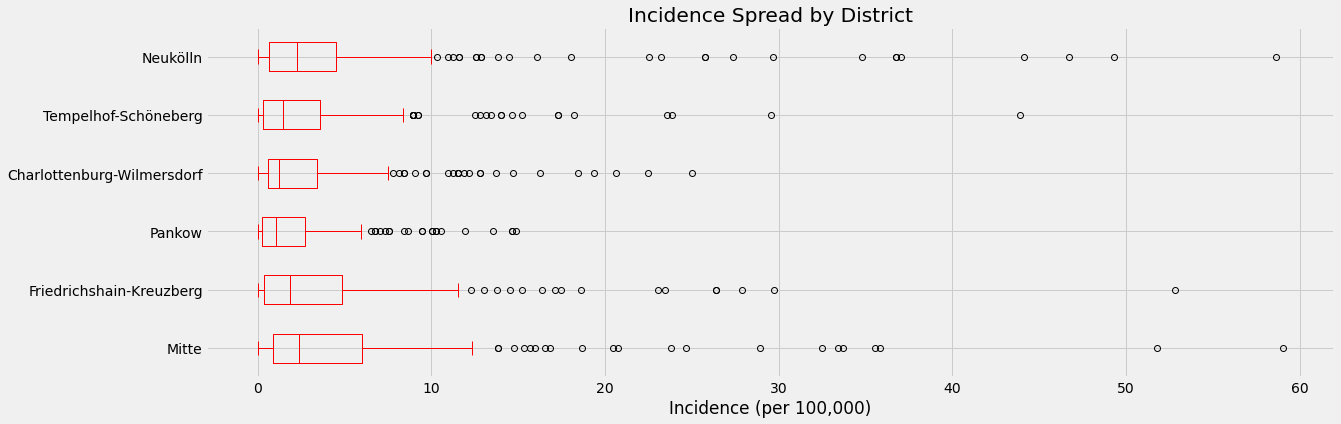

In [649]:
# Boxplot of incidence by district. 
covid_incidence.plot(kind='box', color='red', vert=False, figsize=(18, 6))
plt.title('Incidence Spread by District')
plt.xlabel('Incidence (per 100,000)')

The density plot of incidence reveals that Pankow, Charlottenburg, and Tempelhof-Schoneberg have a fairly tight distribution around the mean, while Mitte and Neukolln have a much broader, right-skewed distribution around a higher mean. 

Text(0.5, 0, 'Incidence (per 100,000)')

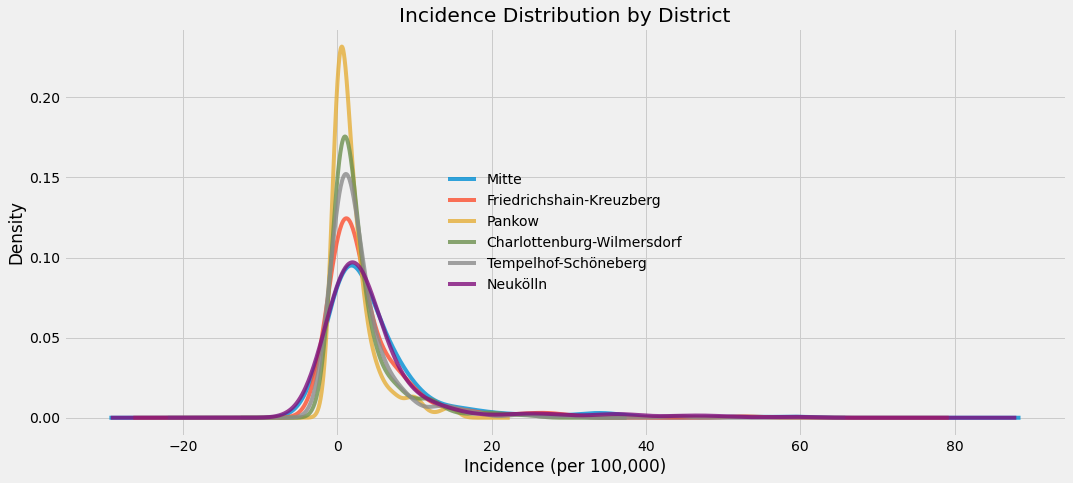

In [650]:
# Density plot of incidence by district
covid_incidence.plot(kind='density', figsize=(16, 7), alpha=0.8)
plt.title('Incidence Distribution by District')
plt.legend(loc='center',frameon=False)
plt.xlabel('Incidence (per 100,000)')